In [1]:
# import packages
# sds:2020 Docker environment
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import seaborn as sns
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib as mpl
import re
import os

import urllib
import json
import requests
import folium
from branca.utilities import split_six

import random
random.seed(42)    # For reproducibility
np.random.seed(42) 

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [2]:
tech_SIC=pd.read_csv('tech_SIC.csv')

/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,4,27,40,65) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#only 22% of the companies have got SIC

In [4]:
#filter rows of SIC in primary_uk_sic_2007
#tech_SIC = data_fa[(data_fa["primary_uk_sic_2007"] == 26511) | (data_fa["primary_uk_sic_2007"] == 26513)]

In [5]:
tech_SIC.describe() #year observed and account all 2018

,Unnamed: 0,Unnamed: 0.1,latest_accounts_cash,latest_accounts_assets,latest_accounts_liabilities,year_obs,sic_year,sic4,change_sic,id,...,keep,merge_max_anna,max_anna,primary_uk_sic_2007,duo_direct_share,merge_fame,fame,birth_year,diss_year,age
count,"319,624.00","319,624.00","11,392.00","158,683.00","28,965.00","319,624.00","264,367.00","264,367.00","264,549.00","264,549.00",...,"259,478.00","264,766.00","264,549.00","319,624.00","306,769.00","319,624.00","319,624.00","264,548.00",599.00,"264,548.00"
mean,"6,420,543.88","6,420,543.88","82,770.62","150,133.37","78,432.67","2,017.53","2,007.00","6,225.80",0.00,"68,851,407.96",...,1.00,2.96,0.98,"61,977.17",95.22,2.83,1.00,"2,011.08","2,016.78",6.35
std,"3,132,362.91","3,132,362.91","777,135.46","4,788,589.14","634,404.90",0.65,0.04,942.64,0.01,"58,000,462.08",...,0.00,0.28,0.14,"8,791.32",13.52,0.38,0.00,8.42,1.19,8.32
min,"1,033.00","1,033.00","-6,176.00","-6,176.00",0.00,"2,011.00","2,003.00",111.00,0.00,86.00,...,1.00,1.00,0.00,"18,201.00",0.00,2.00,1.00,"1,862.00","2,005.00",0.00
25%,"3,735,204.25","3,735,204.25",493.50,"7,781.00","4,269.00","2,017.00","2,007.00","6,201.00",0.00,"3,112,334.00",...,1.00,3.00,1.00,"62,012.00",100.00,3.00,1.00,"2,009.00","2,016.00",1.00
50%,"6,427,709.50","6,427,709.50","7,025.50","26,282.00","14,376.00","2,018.00","2,007.00","6,202.00",0.00,"64,827,853.00",...,1.00,3.00,1.00,"62,020.00",100.00,3.00,1.00,"2,014.00","2,017.00",4.00
75%,"9,164,271.00","9,164,271.00","36,307.00","71,605.00","32,413.00","2,018.00","2,007.00","6,430.00",0.00,"126,194,081.00",...,1.00,3.00,1.00,"63,120.00",100.00,3.00,1.00,"2,017.00","2,018.00",9.00
max,"11,807,541.00","11,807,541.00","54,850,000.00","1,638,311,971.00","72,665,866.00","2,018.00","2,007.00","9,999.00",1.00,"168,733,866.00",...,1.00,3.00,1.00,"74,901.00",100.00,3.00,1.00,"2,018.00","2,018.00",156.00


In [6]:
#filter strings using .str.contains/name.str.startswith
#count_row = data_postcode.shape[0] #len(data_postcode.index)
#count_col = data_postcode.shape[1]

In [7]:
#data on postcode geo
data_postcode=pd.read_csv('ONSPD.csv',header = 0, usecols=['pcds','lat','long','oslaua'])

In [8]:
data_postcode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2608956 entries, 0 to 2608955
Data columns (total 4 columns):
 #   Column  Dtype  
---  ------  -----  
 0   pcds    object 
 1   oslaua  object 
 2   lat     float64
 3   long    float64
dtypes: float64(2), object(2)
memory usage: 79.6+ MB


In [9]:
data_postcode.head()

,pcds,oslaua,lat,long
0,AB1 0AA,S12000033,57.10,-2.24
1,AB1 0AB,S12000033,57.10,-2.25
2,AB1 0AD,S12000033,57.10,-2.25
3,AB1 0AE,S12000034,57.08,-2.26
4,AB1 0AF,S12000033,57.10,-2.26


In [10]:
#add lat long to the tech_SIC
tech_SIC_geo = pd.merge(tech_SIC, data_postcode, how="left", on=["pcds"])

In [11]:
len(tech_SIC_geo.index)

319624

tech_SIC_geo.to_csv('tech_SIC_geo.csv')

In [12]:
#shown on map generally for latest account asset

In [13]:
gdf = gpd.GeoDataFrame(tech_SIC_geo, 
      geometry=gpd.points_from_xy(tech_SIC_geo['long'], tech_SIC_geo['lat'], crs='epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

gdf.plot(column='latest_accounts_assets', cmap='plasma', scheme='quantiles', k=10, markersize=1, figsize=(8,6));

In [14]:
#groupby local authority district
gLAD = gdf.groupby(['oslaua','primary_uk_sic_2007'])['primary_uk_sic_2007'].agg(Count='count').reset_index() # oslaua companies grouped counts
gLAD.head(100)

,oslaua,primary_uk_sic_2007,Count
0,E06000001,"26,110.00",1
1,E06000001,"29,100.00",1
2,E06000001,"29,201.00",1
3,E06000001,"30,110.00",1
4,E06000001,"30,400.00",1
...,...,...,...
95,E06000004,"26,511.00",1
96,E06000004,"26,512.00",1
97,E06000004,"27,110.00",1
98,E06000004,"27,900.00",2


In [15]:
len(gLAD.index)

15770

In [16]:
#groupby local authority district
gLADt = gdf.groupby(['oslaua'])['primary_uk_sic_2007'].agg(Count='count').reset_index() # oslaua companies grouped counts
gLADt.head(100)

,oslaua,Count
0,E06000001,159
1,E06000002,314
2,E06000003,217
3,E06000004,507
4,E06000005,271
...,...,...
95,E07000063,358
96,E07000064,274
97,E07000065,755
98,E07000066,909


gLADt.to_csv('gLADt.csv')

In [17]:
len(gLADt.index)

393

In [18]:
#change coloumn name to match
cols = gLADt.columns.values
cols[0]  = 'LAD13CD'
cols[1]  = 'Counts'
gLADt.columns = cols

In [19]:
gLADt.sample(3, random_state=42)

,LAD13CD,Counts
78,E07000039,235
275,E08000019,1792
247,E07000234,392


In [20]:
gLADt.nsmallest(10,'Counts')

,LAD13CD,Counts
51,E06000053,1
327,M99999999,3
326,L99999999,6
352,S12000023,19
355,S12000027,22
344,S12000013,50
387,W06000019,50
208,E07000191,52
392,W06000024,57
164,E07000136,59


In [21]:
#read LAD geojson

In [22]:
with open('LAD.json', encoding="UTF-8") as json_file:
    LAD_json = json.load(json_file)

In [23]:
print(gLADt["Counts"][2])
print(LAD_json["features"][0]["properties"])

217
{'LAD13CD': 'E06000001', 'LAD13CDO': '00EB', 'LAD13NM': 'Hartlepool', 'LAD13NMW': None}


In [24]:
gLADt.nlargest(10,'Counts')

,LAD13CD,Counts
299,E09000007,11679
325,E09000033,9972
304,E09000012,8647
311,E09000019,7466
42,E06000043,6378
293,E09000001,5796
295,E09000003,4613
322,E09000030,4455
280,E08000025,3674
290,E08000035,3651


In [25]:
#would show empty in chrome but works in safari due to folium issue in showing complex large datasets
bins = [0, 1000, 2000, 3000, 5000, 10000, 12000]
m = folium.Map(location=[55, 4], zoom_start=5)
m.choropleth(
    geo_data=LAD_json,
    data=gLADt,
    columns=['LAD13CD', 'Counts'],
    key_on='feature.properties.LAD13CD',
    fill_color='YlGn',
    threshold_scale = bins,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='no.of companies',
    highlight=True
)

/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


m #another issue of black missing data

In [26]:
m.save("m.html")

In [27]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

In [28]:
#LAD Geopackage
data = os.path.join('data','geo','localauth.json')
if not os.path.exists(data):
    localauth = gpd.read_file('https://raw.githubusercontent.com/supernovajon/tech-cluster/main/LAD.json')
    print("Downloaded localauth.json file.")
else:
    localauth = gpd.read_file(data)

Downloaded localauth.json file.


In [29]:
#add ID
for k in range(len(LAD_json['features'])):
     LAD_json['features'][k]['id'] = k

In [30]:
LAD_json['features'][0].keys()

dict_keys(['type', 'properties', 'geometry', 'id'])

fig = px.choropleth_mapbox(gLADt, geojson=LAD_json, locations=gLADt.LAD13CD, color='Counts',featureidkey="properties.LAD13CD",
                           color_continuous_scale="Viridis",
                           range_color=(0, 11679),
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 51.505453, "lon": -0.268839},
                           opacity=0.5,
                           labels={'comp':'no.comp'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

fig = px.scatter_mapbox(gLADt, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [31]:
#add geometry to gLADt as a result set then plot
rs = pd.merge(localauth, gLADt, how="left", on=["LAD13CD"])

In [32]:
rs

,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry,Counts
0,E06000001,00EB,Hartlepool,None,"MULTIPOLYGON (((-1.24196 54.72245, -1.24251 54...",159
1,E06000002,00EC,Middlesbrough,None,"MULTIPOLYGON (((-1.19705 54.58178, -1.19436 54...",314
2,E06000003,00EE,Redcar and Cleveland,None,"MULTIPOLYGON (((-1.20099 54.57759, -1.20024 54...",217
3,E06000004,00EF,Stockton-on-Tees,None,"MULTIPOLYGON (((-1.30387 54.56514, -1.30199 54...",507
4,E06000005,00EH,Darlington,None,"POLYGON ((-1.63799 54.61719, -1.63766 54.61669...",271
...,...,...,...,...,...,...
375,W06000020,00PM,Torfaen,Torfaen,"POLYGON ((-3.10596 51.79547, -3.09636 51.79154...",141
376,W06000021,00PP,Monmouthshire,Sir Fynwy,"MULTIPOLYGON (((-2.78092 51.52605, -2.78124 51...",311
377,W06000022,00PR,Newport,Casnewydd,"MULTIPOLYGON (((-2.94667 51.62718, -2.94672 51...",377
378,W06000023,00NN,Powys,Powys,"POLYGON ((-3.15484 52.89808, -3.15524 52.89749...",254


rs.to_csv('rs.csv')

In [33]:
rs.nlargest(10,'Counts')

,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry,Counts
299,E09000007,00AG,Camden,None,"POLYGON ((-0.16737 51.57297, -0.16430 51.57250...",11679
325,E09000033,00BK,Westminster,None,"POLYGON ((-0.17414 51.53820, -0.17351 51.53763...",9972
304,E09000012,00AM,Hackney,None,"POLYGON ((-0.06118 51.57778, -0.05843 51.57252...",8647
311,E09000019,00AU,Islington,None,"POLYGON ((-0.11759 51.57415, -0.11718 51.57383...",7466
42,E06000043,00ML,Brighton and Hove,None,"POLYGON ((-0.16589 50.89234, -0.16820 50.88559...",6378
293,E09000001,00AA,City of London,None,"POLYGON ((-0.09679 51.52332, -0.09647 51.52282...",5796
295,E09000003,00AC,Barnet,None,"POLYGON ((-0.19903 51.66820, -0.19664 51.66814...",4613
322,E09000030,00BG,Tower Hamlets,None,"POLYGON ((-0.02947 51.54303, -0.02901 51.54227...",4455
280,E08000025,00CN,Birmingham,None,"POLYGON ((-1.82807 52.60870, -1.81907 52.60614...",3674
290,E08000035,00DA,Leeds,None,"POLYGON ((-1.34285 53.94326, -1.34393 53.93991...",3651


In [34]:
rs.nsmallest(10,'Counts')

,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry,Counts
51,E06000053,00HF,Isles of Scilly,None,"MULTIPOLYGON (((-6.39901 49.86525, -6.39889 49...",1
339,S12000023,00RA,Orkney Islands,None,"MULTIPOLYGON (((-2.91137 58.67382, -2.91335 58...",19
342,S12000027,00RD,Shetland Islands,None,"MULTIPOLYGON (((-1.65079 59.50693, -1.65182 59...",22
331,S12000013,00RJ,Eilean Siar,None,"MULTIPOLYGON (((-7.64974 56.78414, -7.64984 56...",50
374,W06000019,00PL,Blaenau Gwent,Blaenau Gwent,"POLYGON ((-3.24824 51.81515, -3.23877 51.81235...",50
208,E07000191,40UF,West Somerset,None,"POLYGON ((-3.71607 51.23173, -3.71280 51.23158...",52
379,W06000024,00PH,Merthyr Tydfil,Merthyr Tudful,"POLYGON ((-3.40509 51.81742, -3.40479 51.81650...",57
164,E07000136,32UB,Boston,None,"MULTIPOLYGON (((-0.05925 52.86365, -0.06564 52...",59
326,S12000005,00QF,Clackmannanshire,None,"MULTIPOLYGON (((-3.81696 56.10242, -3.82170 56...",77
69,E07000030,16UF,Eden,None,"POLYGON ((-2.39829 54.84416, -2.39272 54.83451...",79


<AxesSubplot:xlabel='Counts', ylabel='Count'>

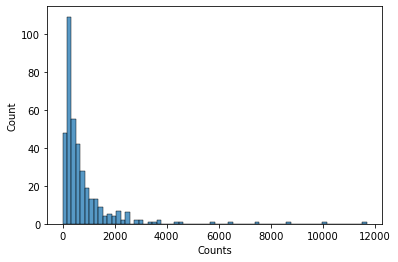

In [35]:
#distribution of counts
sns.histplot(rs["Counts"])

In [36]:
#solve the blank data
rs.isnull().sum()/len(data) *100 #values are missing in Counts for some LADs

LAD13CD        0.00
LAD13CDO       0.00
LAD13NM        0.00
LAD13NMW   1,556.52
geometry       0.00
Counts         0.00
dtype: float64

In [37]:
#fill na with 0 as it is numerical not categorical that needs dummy variables, 
#it simply indicates there is no high-tech company registered in the area here
rs = rs.fillna(0)

In [38]:
bins = [0, 1, 100, 500, 1000, 2000, 5000, 12000]

#new undeprecated way
#be aware that the tiles do not work here LAD_map = folium.Map(location=[55, 4], zoom_start=5, tiles='Mapbox Bright')
n = r'LAD.json' # geojson file

LAD_map = folium.Map(location=[55, 4], zoom_start=5)

# generate choropleth map
folium.Choropleth(
    geo_data=LAD_json,
    data=rs,
    columns=['LAD13CD', 'Counts'],
    key_on='feature.properties.LAD13CD',
    fill_color='YlGn',
    threshold_scale = bins,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='no.of companies',

).add_to(LAD_map)

LAD_map (shown on safari)

LAD_map.save("LAD_map.html")

In [39]:
#zero count
zero_counts = sum(rs['Counts']==0)/rs[rs.Counts>=0].shape[0]*100
print('percentage of zero counts is: ',zero_counts, '%')

percentage of zero counts is:  0.0 %


In [40]:
#one count
one_counts = sum(rs['Counts']==1)/rs[rs.Counts>=0].shape[0]*100
print('percentage of one counts is: ',one_counts, '%')

percentage of one counts is:  0.2631578947368421 %


In [41]:
##clustering on counts at LAD level

In [42]:
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from esda.adbscan import ADBSCAN

In [43]:
#Initialise the Scalers and Transformers
rbs = RobustScaler(quantile_range=[0.025,0.975])
mms = MinMaxScaler(feature_range=(-1,1))
pts = PowerTransformer()

In [44]:
#gLADr is for changing the format for readability and (analyse specific SIC industry) analyse links between tech industries
gLADr = gLAD.pivot(index='oslaua', columns=['primary_uk_sic_2007'], values=['Count']).reset_index()
gLADr.columns = ['LAD13CD',26511,26513,26600,26701,32500,72190,74202,21100,21200,72110,
                                                       62020,62030,62090,63110,26301,26309,61900,26200,26110,26400,26512,
                                                       27110,27200,27310,27900,28910,71121,71122,71200,74100,74901,28110,
                                                       28120,28131,28132,28150,29100,29201,29202,29310,29320,30110,30120,
                                                       30200,30300,30400,59111,59112,59113,59120,59200,18201,18202,18203,
                                                       58210,58290,62011,62012,63120,64301,64302,64303,64304,64305,64306,
                                                       64921,64992,64999,65300]
gLADr.head()

,LAD13CD,26511,26513,26600,26701,32500,72190,74202,21100,21200,...,64301,64302,64303,64304,64305,64306,64921,64992,64999,65300
0,E06000001,nan,nan,nan,nan,nan,1.00,nan,nan,nan,...,6.00,nan,21.00,23.00,32.00,1.00,nan,12.00,nan,3.00
1,E06000002,nan,nan,1.00,nan,nan,1.00,1.00,nan,nan,...,21.00,2.00,38.00,28.00,35.00,1.00,1.00,27.00,3.00,1.00
2,E06000003,nan,nan,nan,1.00,1.00,4.00,nan,nan,nan,...,10.00,nan,30.00,26.00,36.00,nan,8.00,17.00,1.00,1.00
3,E06000004,1.00,nan,nan,2.00,1.00,nan,nan,1.00,nan,...,39.00,nan,59.00,59.00,58.00,nan,6.00,18.00,6.00,8.00
4,E06000005,nan,nan,nan,1.00,2.00,nan,2.00,nan,nan,...,16.00,nan,10.00,25.00,9.00,nan,3.00,24.00,3.00,5.00


In [45]:
gLADr = gLADr.replace(np.nan, 0)

In [46]:
#search for random gLADr
gLADr.sample(3, random_state=42)

,LAD13CD,26511,26513,26600,26701,32500,72190,74202,21100,21200,...,64301,64302,64303,64304,64305,64306,64921,64992,64999,65300
78,E07000039,1.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,...,7.00,0.00,12.00,16.00,9.00,0.00,2.00,16.00,0.00,5.00
275,E08000019,2.00,1.00,0.00,5.00,0.00,6.00,0.00,1.00,1.00,...,90.00,4.00,35.00,60.00,17.00,13.00,12.00,139.00,27.00,30.00
247,E07000234,0.00,1.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,...,39.00,6.00,11.00,25.00,7.00,1.00,0.00,20.00,3.00,10.00


gLADr.to_csv('gLADr.csv')

In [47]:
#Counts are so skewed that using it in most clustering contexts is almost impossible. the reason for using the PowerTransformer

In [48]:
# reset index to LAD13CD
gLADrc = gLADr.fillna(0).set_index('LAD13CD')

In [49]:
gLADrc

,26511,26513,26600,26701,32500,72190,74202,21100,21200,72110,...,64301,64302,64303,64304,64305,64306,64921,64992,64999,65300
LAD13CD,,,,,,,,,,,,,,,,,,,,,
E06000001,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,6.00,0.00,21.00,23.00,32.00,1.00,0.00,12.00,0.00,3.00
E06000002,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,...,21.00,2.00,38.00,28.00,35.00,1.00,1.00,27.00,3.00,1.00
E06000003,0.00,0.00,0.00,1.00,1.00,4.00,0.00,0.00,0.00,0.00,...,10.00,0.00,30.00,26.00,36.00,0.00,8.00,17.00,1.00,1.00
E06000004,1.00,0.00,0.00,2.00,1.00,0.00,0.00,1.00,0.00,0.00,...,39.00,0.00,59.00,59.00,58.00,0.00,6.00,18.00,6.00,8.00
E06000005,0.00,0.00,0.00,1.00,2.00,0.00,2.00,0.00,0.00,0.00,...,16.00,0.00,10.00,25.00,9.00,0.00,3.00,24.00,3.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W06000020,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,...,12.00,0.00,6.00,7.00,5.00,0.00,3.00,6.00,2.00,4.00
W06000021,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,3.00,1.00,...,20.00,0.00,7.00,28.00,8.00,2.00,5.00,23.00,2.00,8.00
W06000022,0.00,1.00,0.00,1.00,0.00,5.00,0.00,0.00,0.00,0.00,...,43.00,2.00,7.00,16.00,14.00,2.00,2.00,25.00,0.00,6.00


In [50]:
gLADrc.to_csv('gLADrc.csv')

In [51]:
gLADrc = pd.read_csv('gLADrc.csv')

# format to industry - sum column value and reindex
pick_counts['period']=(pick_counts.index.values>=rainfall.index.values[...,np.newaxis]).sum(0)
gbdf=pick_counts.groupby('period').sum()
gbdf.index=rainfall.index
gbdf['rainfall']=rainfall
print gbdf

In [52]:
industry = pd.read_csv('industrybioit.csv').set_index('LAD13CD')

In [53]:
industry

,bio,IT
LAD13CD,,
E06000001,1,4
E06000002,3,3
E06000003,6,0
E06000004,5,5
E06000005,5,1
...,...,...
W06000020,2,2
W06000021,6,1
W06000022,7,3


In [54]:
# filter/use coloumns
glad_bio = pd.read_csv('gLADrc.csv', usecols=['LAD13CD','26511','26513','26600','26701','32500','72190','74202','21100','21200','72110']).set_index('LAD13CD')

In [55]:
glad_it = pd.read_csv('gLADrc.csv', usecols=['LAD13CD','62020','62030','62090','63110','58210','58290','62011','62012','63120']).set_index('LAD13CD')

In [56]:
glad_it

,62020,62030,62090,63110,58210,58290,62011,62012,63120
LAD13CD,,,,,,,,,
E06000001,0.00,0.00,0.00,0.00,2.00,1.00,0.00,1.00,0.00
E06000002,0.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00,0.00
E06000003,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
E06000004,1.00,1.00,0.00,0.00,1.00,0.00,0.00,2.00,0.00
E06000005,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
W06000020,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
W06000021,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
W06000022,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


gdf = gpd.GeoDataFrame(tech_asset_bio4, 
      geometry=gpd.points_from_xy(tech_asset_bio4['long'], tech_asset_bio4['lat'], crs='epsg:4326'))
#gdf = gdf.to_crs('epsg:27700')

#drop dupilicate
gdf1 = gdf.drop_duplicates(subset=['LAD13CD'])

#add lat long to the tech_SIC
biolad1 = pd.merge(biolad, gdf1, how="left", on="LAD13CD")

gLADrcgeo = pd.merge(localauth, gLADrc, left_on='LAD13CD', right_index=True).set_index('LAD13CD')

gLADrcgeo = gLADrcgeo.drop(['LAD13NM','LAD13NMW','LAD13CDO'],axis=1)

# divider

In [57]:
gLADrc = industry

# divider

In [58]:
#then transform
for c in gLADrc.columns.values:
    gLADrc[c] = pts.fit_transform(gLADrc[c].values.reshape(-1,1))
gLADrc.head(10)

,bio,IT
LAD13CD,,
E06000001,-1.59,-0.44
E06000002,-0.77,-0.70
E06000003,-0.12,-2.44
E06000004,-0.30,-0.23
E06000005,-0.30,-1.54
E06000006,0.04,0.33
E06000007,0.04,0.82
E06000008,0.04,0.68
E06000009,-0.51,-0.44


cols_to_plot = np.random.choice(gLADrc.columns.values, 4, replace=False)
print(cols_to_plot)

cols_to_plot

In [59]:
#variable SIC code industry classification -just for variable plot
bio_cols = [21100,21200,72110]

## First K-Means Clustering

In [60]:
c_nm   = 'KMeans' # Clustering name
k_pref = 2 # Number of clusters (from below)

kmeans = KMeans(n_clusters=k_pref, n_init=25, random_state=42).fit(gLADrc) # The process

print(kmeans.labels_) # The results

[0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0]


In [61]:
rss = pd.merge(localauth, gLADrc, left_on='LAD13CD', right_index=True).set_index('LAD13CD')

In [62]:
rss.head(2)[[26511,26513]]

KeyError: "None of [Int64Index([26511, 26513], dtype='int64')] are in the [columns]"

In [63]:
# Add it to the data frame
rss[c_nm] = pd.Series(kmeans.labels_, index=gLADrc.index)

In [64]:
rss

,LAD13CDO,LAD13NM,LAD13NMW,geometry,bio,IT,KMeans
LAD13CD,,,,,,,
E06000001,00EB,Hartlepool,None,"MULTIPOLYGON (((-1.24196 54.72245, -1.24251 54...",-1.59,-0.44,0
E06000002,00EC,Middlesbrough,None,"MULTIPOLYGON (((-1.19705 54.58178, -1.19436 54...",-0.77,-0.70,0
E06000003,00EE,Redcar and Cleveland,None,"MULTIPOLYGON (((-1.20099 54.57759, -1.20024 54...",-0.12,-2.44,0
E06000004,00EF,Stockton-on-Tees,None,"MULTIPOLYGON (((-1.30387 54.56514, -1.30199 54...",-0.30,-0.23,0
E06000005,00EH,Darlington,None,"POLYGON ((-1.63799 54.61719, -1.63766 54.61669...",-0.30,-1.54,0
...,...,...,...,...,...,...,...
W06000020,00PM,Torfaen,Torfaen,"POLYGON ((-3.10596 51.79547, -3.09636 51.79154...",-1.11,-1.04,0
W06000021,00PP,Monmouthshire,Sir Fynwy,"MULTIPOLYGON (((-2.78092 51.52605, -2.78124 51...",-0.12,-1.54,0
W06000022,00PR,Newport,Casnewydd,"MULTIPOLYGON (((-2.94667 51.62718, -2.94672 51...",0.04,-0.70,0


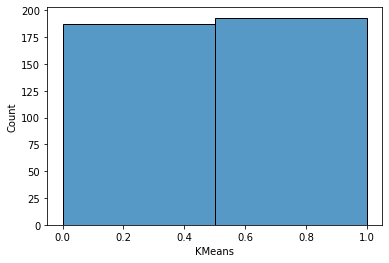

In [65]:
# How are the clusters distributed
ax = sns.histplot(data=rss, x=c_nm, bins=k_pref);

KeyError: 21100

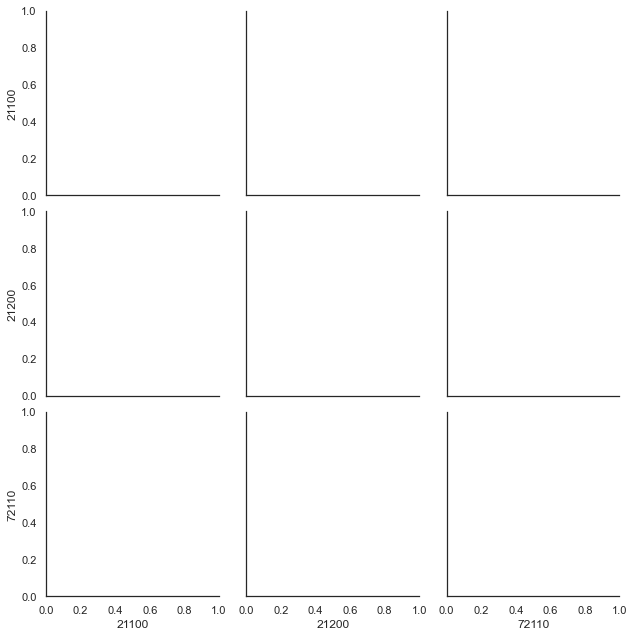

In [66]:
# Going to be a bit hard to read if plot every variable against everyother variables, so we'll just pick a random col_to_plot
sns.set(style="white")
sns.pairplot(rss, 
             vars=bio_cols, 
             hue=c_nm, markers=".", height=3, diag_kind='kde');

In [72]:
from io import BytesIO, StringIO
from os.path import join as pj
from pathlib import Path
import matplotlib as mpl
from matplotlib.colors import ListedColormap

import sklearn
sklv = int(sklearn.__version__.replace(".",""))
if sklv < 210:
    print("SciKit-Learn verion is: " + sklearn.__version__)
    print("The OPTICS part of this notebook relies on a version >= 0.21.0")

from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing
from sklearn import cluster

import random
random.seed(42)    # For reproducibility
np.random.seed(42) # For reproducibility

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [73]:
def default_cmap(n, outliers=False):
    cmap = mpl.cm.get_cmap('viridis_r', n)
    colors = cmap(np.linspace(0,1,n))
    if outliers:
        gray = np.array([225/256, 225/256, 225/256, 1])
        colors = np.insert(colors, 0, gray, axis=0)
    return ListedColormap(colors)

# mappable = ax.collections[-1] if you add the geopandas
# plot last.
def add_colorbar(mappable, ax, cmap, norm, breaks, outliers=False):
    cb = fig.colorbar(mappable, ax=ax, cmap=cmap, norm=norm,
                    boundaries=breaks,
                    extend=('min' if outliers else 'neither'), 
                    spacing='uniform',
                    orientation='horizontal',
                    fraction=0.05, shrink=0.5, pad=0.05)
    cb.set_label("Cluster Number")

In [74]:
def plt_ldn(b):
    fig, ax = plt.subplots(1, figsize=(14, 16))
    b.plot(ax=ax, edgecolor='#cc2d2d', facecolor='None', zorder=3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    return fig, ax

/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.

/opt/anaconda3/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.



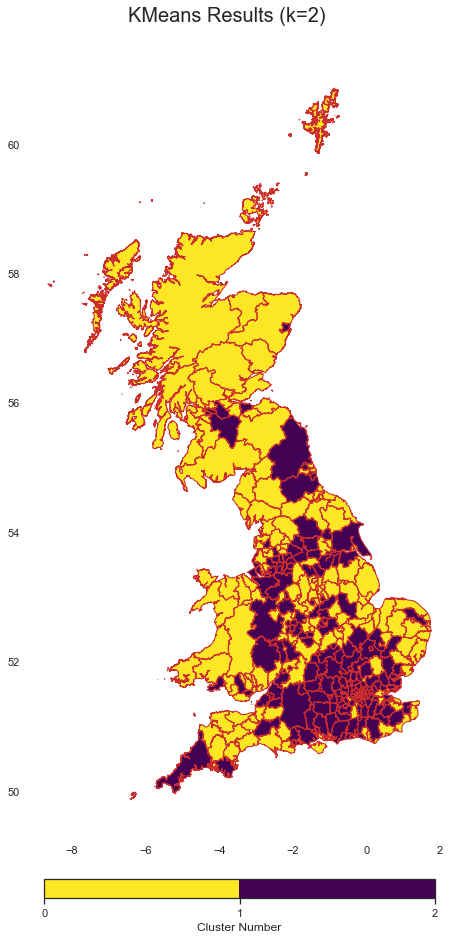

In [75]:
breaks = np.arange(0,rss[c_nm].max()+2,1)
cmap   = default_cmap(len(breaks))

norm    = mpl.colors.BoundaryNorm(breaks, cmap.N)

fig, ax = plt_ldn(localauth)
fig.suptitle(f"{c_nm} Results (k={k_pref})", fontsize=20, y=0.92)
rss.plot(column=c_nm, ax=ax, cmap=cmap, norm=norm, linewidth=0, zorder=0)

add_colorbar(ax.collections[-1], ax, cmap, norm, breaks)

I would also consider using PCA on groups of related variables (e.g. the housing features as a group, the ethnicity features as a group, etc.) and then take the first few eigenvalues from each group and cluster on all of those together. This would remove quite a bit of the correlation between variables and still allow us to perform hierarchical and other types of clustering on the result. It might also do a better job of preserving outliers.

Processing cluster 0
Processing cluster 1


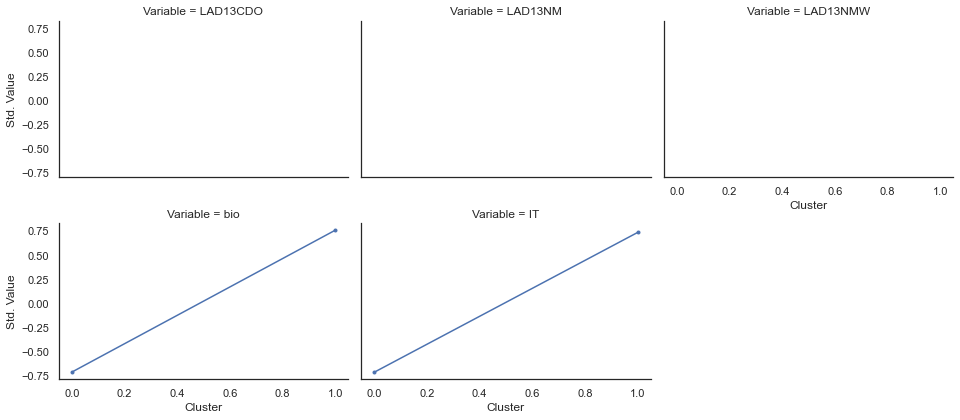

In [78]:
centroids = None
for k in sorted(rss[c_nm].unique()):
    print(f"Processing cluster {k}")

    c = rss[rss[c_nm]==k]
    if centroids is None:
        centroids = pd.DataFrame(columns=c.columns.values)
    centroids = centroids.append(c.mean(), ignore_index=True)
    
odf = pd.DataFrame(columns=['Variable','Cluster','Std. Value'])
for i in range(0,len(centroids.index)):
    row = centroids.iloc[i,:]
    c_index = list(centroids.columns.values).index(c_nm)
    for c in range(0,c_index):
        d = {'Variable':centroids.columns[c], 'Cluster':row[c_index], 'Std. Value':row[c]}
        odf = odf.append(d, ignore_index=True)
        
odf = odf[~odf.Variable.isin(['Borough','msoa11hclnm','Subregion','geometry'])]
g = sns.FacetGrid(odf, col="Variable", col_wrap=3, height=3, aspect=1.5, margin_titles=True, sharey=True)
g = g.map(plt.plot, "Cluster", "Std. Value", marker=".")

In [71]:
#above used 3. choose the right cluster number with silhouette_score

The 'Right' Number of Clusters

Again, there's more than one way to skin this cat. In Geocomputation they use WCSS to pick the 'optimal' number of clusters. The idea is that you plot the average WCSS for each number of possible clusters in the range of interest (2...n) and then look for a 'knee' (i.e. kink) in the curve. The principle of this approach is that you look for the point where there is declining benefit from adding more clusters. The problem is that there is always some benefit to adding more clusters (the perfect clustering is k==n), so you don't always see a knee.

Another way to try to make the process of selecting the number of clusters a little less arbitrary is called the silhouette plot and (like WCSS) it allows us to evaluate the 'quality' of the clustering outcome by examining the distance between each observation and the rest of the cluster. In this case it's based on Partitioning Around the Medoid (PAM).

Either way, to evaluate this in a systematic way, we want to do multiple k-means clusterings for multiple values of k and then we can look at which gives the best results...

Let's try it for the range 3-9.

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In this example the silhouette analysis is used to choose an optimal value for n_clusters. The silhouette plot shows that the n_clusters value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 4.

Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 0 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 3 sub clusters into one big cluster. However when the n_clusters is equal to 4, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right.

In [ ]:
# evluation of k mean using silhouette analysis rather than elbow techniqu
#https://medium.com/@cmukesh8688/silhouette-analysis-in-k-means-clustering-cefa9a7ad111
# Adapted from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
#gLADrc = gLADr.drop(list(gLADr.columns[gLADr.isnull().any().values].values), axis=1)

text = []

for k in range(2,10):
    # Debugging
    print("Cluster count: " + str(k))
    
    #############
    # Do the clustering using the main columns
    clusterer = KMeans(n_clusters=k, n_init=15, random_state=42, n_jobs=-1)
    cluster_labels = clusterer.fit_predict(gLADrc)
    
    # Calculate the overall silhouette score
    silhouette_avg = silhouette_score(gLADrc, cluster_labels)
    text = text + [f"For k={k} the average silhouette_score is: {silhouette_avg:6.4f}"]
    
    # Calculate the silhouette values
    sample_silhouette_values = silhouette_samples(gLADrc, cluster_labels)
    
    #############
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1.0, 1.0]) # Changed from -0.1, 1
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, gLADrc.shape[0] + (k + 1) * 10])
    
    y_lower = 10
    
    # For each of the clusters...
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Set the color ramp
        #cmap  = cm.get_cmap("Spectral")
        color = plt.cm.Spectral(i/k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks(np.arange(-1.0, 1.1, 0.2)) # Was: [-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]

    # 2nd Plot showing the actual clusters formed --
    # we can only do this for the first two dimensions
    # so we may not see fully what is causing the 
    # resulting assignment
    colors = plt.cm.Spectral(cluster_labels.astype(float) / k)
    ax2.scatter(gLADrc[gLADrc.columns[0]], gLADrc[gLADrc.columns[1]], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("Visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

    plt.show()

print("\n".join(text))    

In [ ]:
#using k=6 as the presence of clusters with higher average silhouette scores 
#and also due to wide fluctuations in the size of the silhouette plots

In [ ]:
# Adapted from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score

x = []
y = []

for k in range(2,41):
    
    #############
    # Do the clustering using the main columns
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=42).fit(gLADrc)
    
    # Calculate the overall silhouette score
    silhouette_avg = silhouette_score(gLADrc, kmeans.labels_)
    
    y.append(k)
    x.append(silhouette_avg)
    
    print('.', end='')

print()
print(f"Largest silhouette score was {max(x):6.4f} for k={y[x.index(max(x))]}")

plt.plot(y, x)
plt.gcf().suptitle("Average Silhouette Scores");

#### DB SCAN

gLADrc2 = gLADrc[[21100,21200]]
gLADrc2.head(100)

In [ ]:
gLADrc2 = gLADrc

In [ ]:
nbrs = NearestNeighbors(n_neighbors=2).fit(gLADrc2)
distances, indices = nbrs.kneighbors(gLADrc2)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.gcf().suptitle("Nearest Neighbour Distances");

In [ ]:
#There's an argument for making min_samples = len(df.columns)+1 so here it is gLADrc2.shape[1]+1

In [ ]:
c_nm = 'DBSCAN'

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.4f}'.format(x))

el  = []

max_clusters  = 10
cluster_count = 1

iters = 0

for e in np.arange(0.025, 0.25, 0.005):
    
    if iters % 25==0: print(f"{iters} epsilons explored.") 
    
    # Run the clustering
    dbs = DBSCAN(eps=e, min_samples=2*gLADrc2.shape[1]).fit(gLADrc2)
    
    # See how we did
    s = pd.Series(dbs.labels_, index=gLADrc2.index, name=c_nm)
    
    row = [e]
    data = s.value_counts()
    
    for c in range(-1, max_clusters+1):
        try:
            if np.isnan(data[c]):
                row.append(None)
            else: 
                row.append(data[c])
        except KeyError:
            row.append(None)
    
    el.append(row)
    iters+=1

edf = pd.DataFrame(el, columns=['Epsilon']+["Cluster " + str(x) for x in list(range(-1,max_clusters+1))])

# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

print("Done.")

In [ ]:
odf = pd.DataFrame(columns=['Epsilon','Cluster','Count'])

for i in range(0,len(edf.index)):
    row = edf.iloc[i,:]
    for c in range(1,len(edf.columns.values)):
        if row[c] != None and not np.isnan(row[c]):
            d = {'Epsilon':row[0], 'Cluster':f"Cluster {c-2}", 'Count':row[c]}
            odf = odf.append(d, ignore_index=True)

odf['Count'] = odf.Count.astype(float)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=odf, x='Epsilon', y='Count', hue='Cluster');
ax.vlines(0.2, 0, ax.get_ylim()[1], linestyle='dashed', color='r');

In [ ]:
e = 0.25
dbs = DBSCAN(eps=e, min_samples=2*gLADrc2.shape[1]).fit(gLADrc2.values)
s = pd.Series(dbs.labels_, index=gLADrc2.index, name=c_nm)
rss[c_nm] = s
print(s.value_counts())

In [ ]:
fig, ax = plt_ldn(localauth)
fig.suptitle(f"{c_nm} Results", fontsize=20, y=0.92)
rss.plot(column=c_nm, ax=ax, linewidth=0, zorder=0, legend=True, categorical=True);

fig, ax = plt_ldn(localauth)
ax.set_axis_off()
ax.set_title('UK tech number on LAD',fontsize=20, y=1.02)
rs.plot(column='Counts', ax=ax, linewidth=0, zorder=0,
        legend=True, scheme='equalinterval', edgecolor='k',
        cmap='tab20c',k=20)

fig.savefig('UK tech number on LAD.png', dpi=150)#might need to add labels

#Freeing Up Memory - free up some RAM by getting rid of some variables and datasets
in_scope  = set([x for x in dir() if not x.startswith('_')])
to_delete = set(['raw','clean','transformed','col','k','c','lsoac','scdf'])
z = list(in_scope.intersection(to_delete))
del(z)

data_3=pd.read_csv('OC_3.1.csv')